# Gradient Descent

### Submitted by: Vatsalya Gupta, SC19B098, B.Tech. ECE VII Sem

# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient  # stubs

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

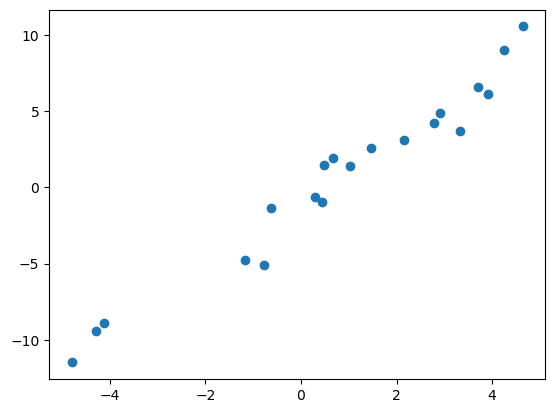

In [2]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2.$$
Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [3]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768486
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [4]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf();

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1); 
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], []);
    dot,  = ax1.plot([], [], marker='o');

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2);
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<Figure size 1000x400 with 0 Axes>

# TODO: implement the gradient
1. Review the mathematical expressions for $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$ for our model and cost funtion. (**Hint**: they are in the slides!)
1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.

Then run this cell to test your code: 

In [5]:
print(gradient(np.array([1, 2]), np.array([0, 1]), 0,  1)) # should print (2, 3)
print(gradient(x, y, 0,  1))   # should print (3.569176215534113, -163.58239266243288)
print(gradient(x, y, 2, -1))   # should print (10.94724640649514, -462.08205479805036)

(2, 3)
(3.569176215534111, -163.58239266243288)
(10.94724640649514, -462.0820547980504)


# TODO: implement gradient descent

1. In this cell you will implement gradient descent: 
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update `theta_0` and `theta_1` using the partial derivatives (**Hint**: use the function ``gradient`` in ``gd.py``) 
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

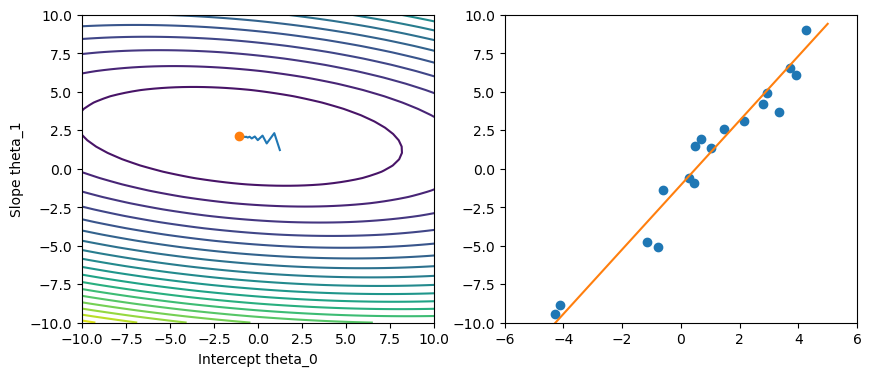

In [6]:
line, dot, hyp = init_plot()

iters = 30  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function

theta_0 = np.random.randn()
theta_1 = np.random.randn()
step_size = 0.01
cost = []

###################################################################################

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    #    - save cost function at each step (hint: call a function we gave you above)
    
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    theta_0 -= step_size * d_theta_0
    theta_1 -= step_size * d_theta_1
    cost.append(mycost(theta_0, theta_1))
    
    #################################################################################

# TODO: assess convergence
Plot the iteration (x-axis) vs. cost.

Text(0.5, 0, 'No. of iterations')

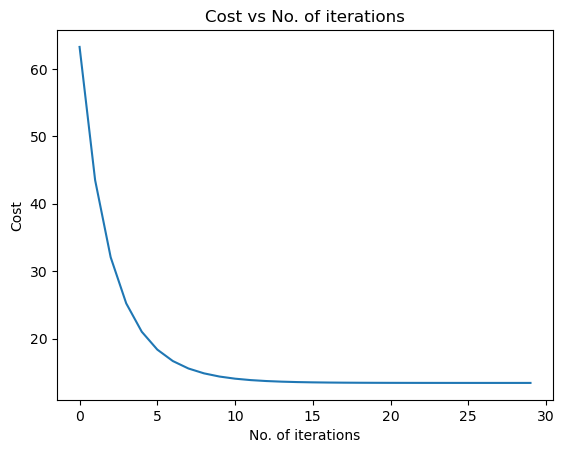

In [7]:
############################################
# TODO: Write code to plot and display here

plt.plot(range(iters), cost)
plt.title("Cost vs No. of iterations")
plt.ylabel("Cost")
plt.xlabel("No. of iterations")

###########################################

 Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

** *Write your answer here*. **

**Answer:** Yes, the algorithm seems to converge from 20 iterations onwards, since the cost value minimises.

# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

In [8]:
############################################
# TODO: Put experimental code here 

def gradient_descent(step_size = 0.001, iters = 100):
    
    theta_0 = np.random.randn()   
    theta_1 = np.random.randn()
    cost = []

    for i in range(iters):
        d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
        theta_0 -= step_size * d_theta_0
        theta_1 -= step_size * d_theta_1
        cost.append(mycost(theta_0, theta_1))
        
    plt.plot(range(iters), cost)
    plt.title(f"Cost vs No. of iterations (step size: {step_size})")
    plt.ylabel("Cost")
    plt.xlabel("No. of iterations")

###########################################

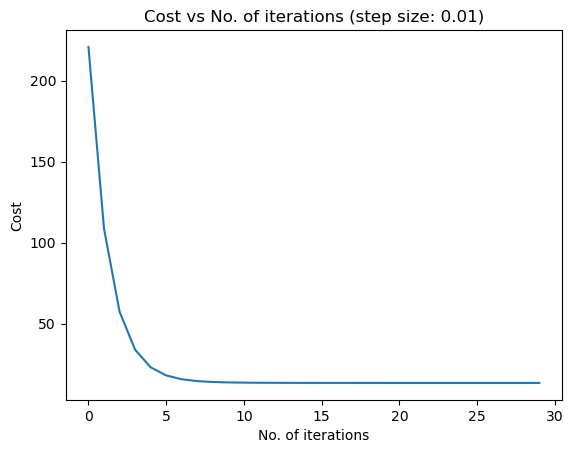

In [9]:
gradient_descent(0.01, 30)

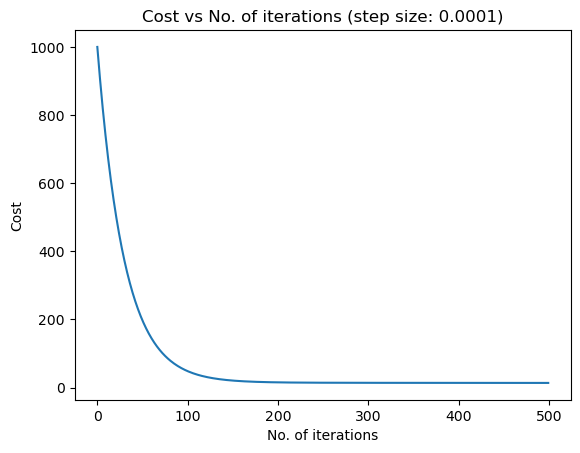

In [10]:
gradient_descent(0.0001, 500)

/home/vatsalya/Downloads/gd.py:21: RuntimeWarning: overflow encountered in square
  cost = 0.5 * np.sum((theta1 * x + theta0 - y) ** 2)


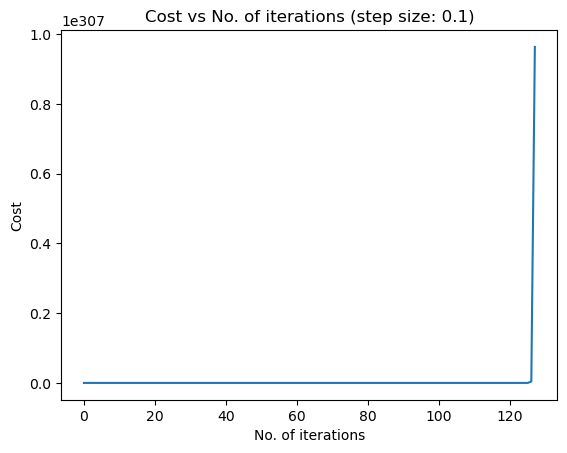

In [11]:
gradient_descent(0.1, 250)

** *Write your answer here*. **

**Answer:** The following table summarises how the number of iterations for convergence vary with the step size.
| **Step Size** | **No. of Iterations for Convergence** |
|:-------------:|:-------------------------------------:|
|      0.01     |                  > 20                 |
|     0.0001    |                 > 300                 |
|      0.1      |           does not converge           |